# ОНПД. Лабораторна робота №4

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
# Датасет: https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales
# Зчитуємо дані
all_data = pd.read_csv('linear_reg/ice_cream.csv')

# Зробимо тренувальну та тестову вибірки, фільтруючи їх за індексом
all_data.loc[all_data.index < 300].to_csv('linear_reg/ice_cream_train.csv', index=False)
all_data.loc[all_data.index >= 300].to_csv('linear_reg/ice_cream_test.csv', index=False)

In [4]:
# Зчитуємо тренувальні дані
mydata = pd.read_csv('linear_reg/ice_cream_train.csv')

In [5]:
# Перші 5 рядків датасету
mydata.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [6]:
# Останні 5 рядків датасету
mydata.tail()

,Temperature,Ice Cream Profits
295,84,64.10
296,84,66.26
297,84,63.63
298,84,67.58
299,84,68.54


In [7]:
# Розмір набору даних
mydata.shape

(300, 2)

In [8]:
# Виведення інформації про датасет. Перевірка на наявність пропущених даних
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        300 non-null    int64  
 1   Ice Cream Profits  300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


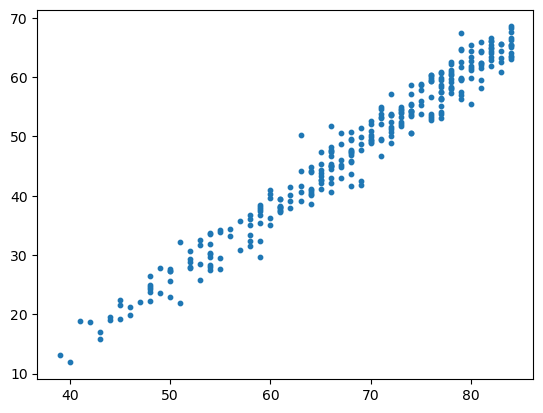

In [9]:
# Виводимо графік тренувального набору даних
plt.scatter(mydata['Temperature'], mydata['Ice Cream Profits'], s=10)

In [10]:
# Переформуємо структуру даних та визначимо незалежні та залежні змінні
X = mydata['Temperature'].values.reshape(-1, 1)
Y = mydata['Ice Cream Profits'].values.reshape(-1, 1)

In [11]:
# Виведемо перші десять значень стопвця Temperature
mydata['Temperature'].head(10)

0    39
1    40
2    41
3    42
4    43
5    43
6    44
7    44
8    45
9    45
Name: Temperature, dtype: int64

In [12]:
# Виведемо перші десять значень незалежної змінної
X[0:10]

array([[39],
       [40],
       [41],
       [42],
       [43],
       [43],
       [44],
       [44],
       [45],
       [45]], dtype=int64)

In [13]:
# Розіб'ємо дані на тренувальні та перехресної перевірки
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.3, random_state=143)

In [14]:
# Навчаємо регресійну модель тренувальними даними
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [15]:
# Виведемо перші 5 тренувальних значень та передбачення на їх основі 
some_data = X_train[:5]
some_labels = y_train[:5]
print('Predictions: ' , lin_reg.predict(some_data))
print('Labels: ', some_labels)

Predictions:  [[60.34599497]
 [59.16856359]
 [63.87828912]
 [56.81370082]
 [62.70085774]]
Labels:  [[56.34]
 [62.2 ]
 [64.97]
 [59.69]
 [59.47]]


In [16]:
# Перевіримо середньоквадратичну помилку
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_train)
mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)
rmse

2.4076646807534696

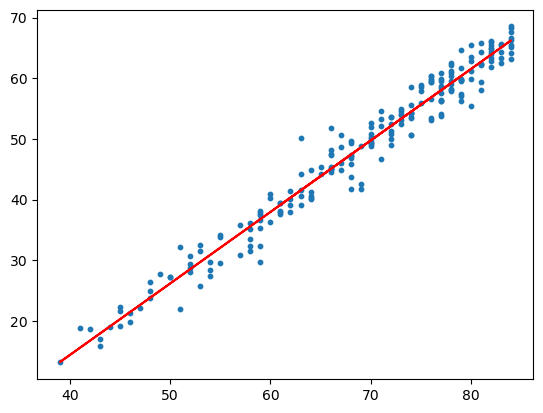

In [17]:
# Відобразимо тренувальні дані та передбачення на їх основі
plt.scatter(X_train, y_train, s=10)
plt.plot(X_train, predictions, color='red')
plt.show()

In [18]:
# Виконаємо передбачення на даних перехресної перевірки та знайдемо середньоквадратичну помилку
cv_predictions = lin_reg.predict(X_cv)
cv_mse = mean_squared_error(y_cv, cv_predictions)
cv_rmse = np.sqrt(cv_mse)
cv_rmse

2.365208470830609

In [19]:
# Завантажимо тестовий набір даних для перевірки моделі
data_test = pd.read_csv('linear_reg/ice_cream_test.csv')

X_test = data_test['Temperature'].values.reshape(-1, 1)
y_test = data_test['Ice Cream Profits'].values.reshape(-1, 1)

In [20]:
# Визначимо середньоквадратичну помилку на тестовому наборі даних
final_predictions = lin_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.5748074159082233

In [21]:
# Перевіримо коефіцієнт детермінації R^2
from sklearn.metrics import r2_score
score = r2_score(y_test, final_predictions)
score

0.8448524181255814

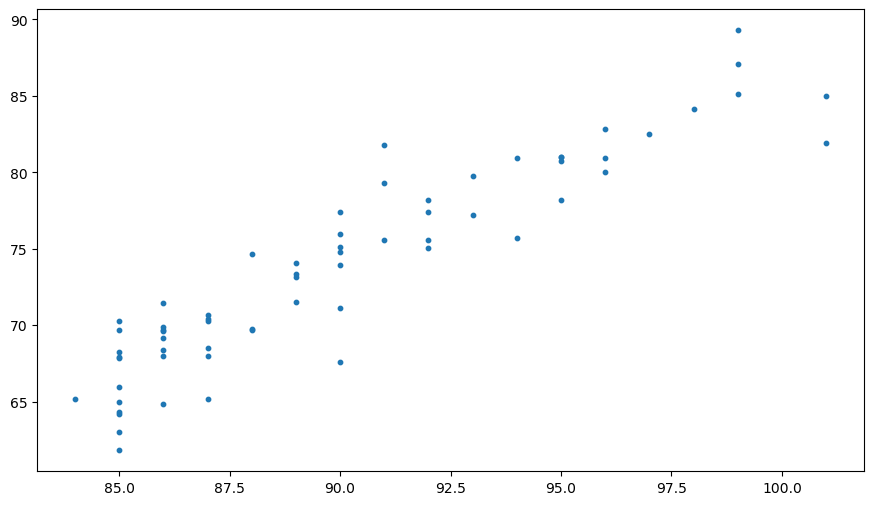

In [22]:
# Дані з тестового набору
plt.figure(figsize=(10.66, 6))
plt.scatter(data_test['Temperature'], data_test['Ice Cream Profits'], s=10)
plt.savefig('linear_reg/raw_data.jpg')

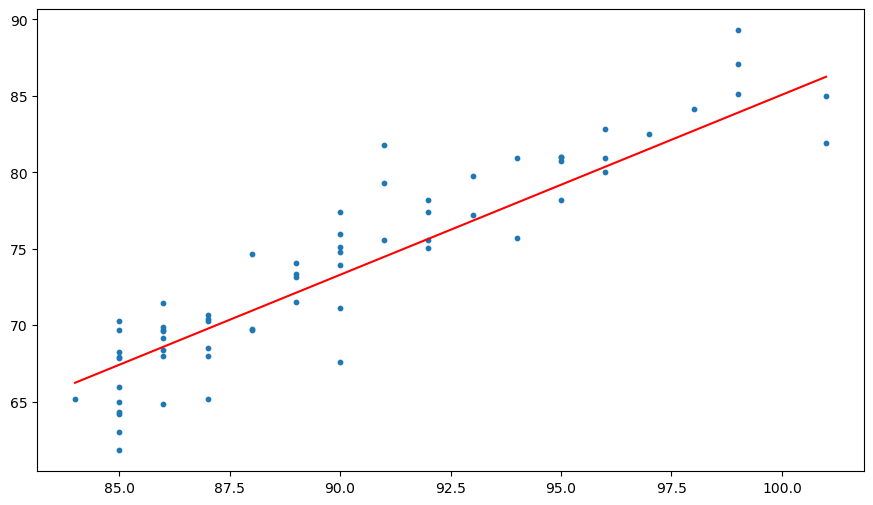

In [23]:
# Відобразимо тестові дані та передбачення на їх основі
plt.figure(figsize=(10.66, 6))
plt.scatter(data_test['Temperature'], data_test['Ice Cream Profits'], s=10)
plt.plot(X_test, final_predictions, color='red')
plt.savefig('linear_reg/final_graph.jpg')